In [1]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../../")
from  CommonFunc import *

◎ 현재 경로의 폴더 목록 --
  1. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/데이터파일
  2. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/사진
  4. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/__pycache__
  9. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/jihwan_예측율_test
◎ 주피터 가상환경 체크 : base
◎ Python 설치 경로:/opt/anaconda3/bin/python
◎ Graph 한글화 Setting
◎ OS platform 한글 세팅완료
✻✻✻✻______😜 19-20 번 파일 데이터 보고 분석 by Forrest.D.Park 😜______✻✻✻✻


Data File 불러오는 중..:  1%|          | 1/100 [elapsed: 00:00 remaining: 00:12]



19.여성가족부_아이돌봄서비스 현장모니터링 결과_지표문항_3점 척도_20240331.xlsx 파일의 데이터 프레임.tail() 


,기준년월,센터명,서비스종류,서비스유형,응답일자,상위센터명,3점척도_전체응답_가구수,3점척도_3점_가구수,3점척도_2점_가구수,3점척도_1점_가구수,최초등록일시
1819,2024-03-01,경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터,시간제,시간제-라형,2020-01-01,경기도 광역거점,0,0,0,0,2024-04-05 00:10:00
1820,2024-03-01,경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터,종일제,종일제-가형,2020-01-01,경기도 광역거점,0,0,0,0,2024-04-05 00:10:00
1821,2024-03-01,경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터,종일제,종일제-나형,2020-01-01,경기도 광역거점,0,0,0,0,2024-04-05 00:10:00
1822,2024-03-01,경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터,종일제,종일제-다형,2020-01-01,경기도 광역거점,0,0,0,0,2024-04-05 00:10:00
1823,2024-03-01,경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터,종일제,종일제-라형,2020-01-01,경기도 광역거점,0,0,0,0,2024-04-05 00:10:00


 ◎ Column  : 11 개 

   기준년월,    센터명,    서비스종류,    서비스유형,    응답일자, 
   상위센터명,    3점척도_전체응답_가구수,    3점척도_3점_가구수,    3점척도_2점_가구수,    3점척도_1점_가구수, 
   최초등록일시, 
 ◎ Row size    : 1824 개
 ◎ Null count   : 0 개
 ◎ 칼럼별 데이터 중복체크
   □ 1번째 칼럼 " 기준년월"  타입 datetime64[ns]) 
    1 	/1824 	[uniq/raw]


,"""기준년월"" 칼럼의 중복값",개수분포
1,2024-03-01,1824


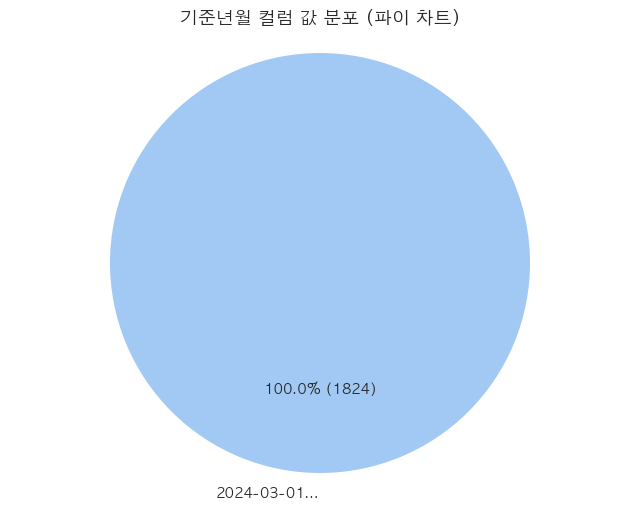

숫자형데이터가 아닙니다
   □ 2번째 칼럼 " 센터명"  타입 object) 
    228 	/1824 	[uniq/raw]


,"""센터명"" 칼럼의 중복값",개수분포
1,충북 옥천군 가족센터,8
2,전북 장수군 사단법인 장수군자원봉사센터,8
3,전북 정읍시가족센터,8
4,전북 진안군 가족센터,8
5,전남 곡성군 가족센터,8
6,전남 강진군 가족센터,8
7,전남 고흥군가족센터,8
8,전남 광양시 가족센터,8
9,전남 구례군 (사)구례군새마을회,8
10,전남 나주시 아이돌보미지원센터,8


AttributeError: 'str' object has no attribute 'set_text'

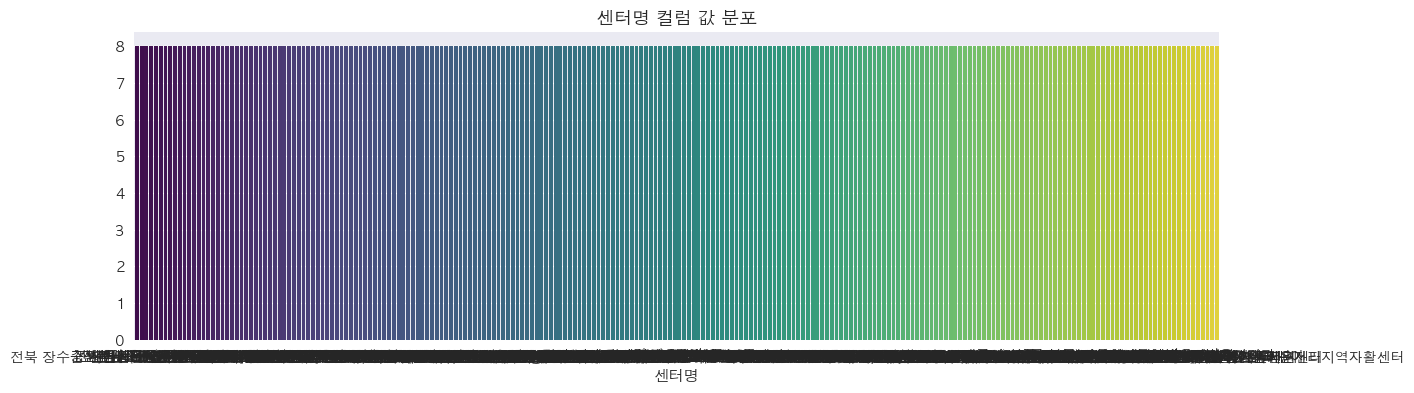

In [2]:

def data_watch(start_):
    
    DataPreprocessing.plotSetting()
    ## Data Fetching
    data_folder_path="./데이터파일"
    start_data  =start_
    end_data =start_data+1
    Analysis_title(f"{start_data}-{end_data} 번 파일 데이터 보고 분석 by Forrest.D.Park")
    data_dict=DataPreprocessing.data_fetch(data_folder_path,start_data,end_data)
    for i in range(len(data_dict.keys())):
        data_num= sorted(data_dict.keys())[i]
        print(yellow(f"\n\n{data_num} 파일의 데이터 프레임.tail() "))
        # 화면 가운데 정렬하여 출력
        df_display_centered(DataPreprocessing.key_selector(data_dict, i).tail())
        DataPreprocessing.dataInfo2(DataPreprocessing.key_selector(data_dict,i))
    return data_dict

data_dict=data_watch(19)

--- 
### 수치형 데이터일 경우 Gropu by 하고 싶을 때 돌리는 함수 제작 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test = DataPreprocessing.key_selector(data_dict, 0)
# df_display_centered(test.tail(3))
기준연월 = test['기준연월'].unique()
## 시간대별 데이터를 보는 함수 
def plot_by_timeline(df, time_col_word='시간',group_by_col =['기준연월'], delete_column = '데이터기준일자'):
    if delete_column in df.columns:
        
        df.drop(columns=delete_column, inplace=True)
    numeric_columns=test.select_dtypes(include=['number'])
    # time_columns = [col for col in df.columns if time_col_word in col] ## 들어간 단어로 구분하고싶을때
    # print(time_columns)
    # 시간대별 데이터 그룹화
    # print(type(numeric_columns))
    grouped_df_sum = numeric_columns.groupby(group_by_col).sum().reset_index()  
    grouped_df_mean = numeric_columns.groupby(group_by_col).mean().reset_index()  


    return grouped_df_mean,grouped_df_sum  # grouped_df_mean 반환
def pie_plot(df,plot_title=""):
    import matplotlib.pyplot as plt
    import seaborn as sns, pandas as pd
    plt.figure(figsize=(8, 6))  # 그래프 크기 설정
    # 시간대별 시작 건수 합계 계산

    # # 상위 8개 이외의 값을 "기타"로 합치기
    # top_8_index = time_table.nlargest(7).index
    # other_sum = time_table[~time_table.index.isin(top_8_index)].sum()
    # time_table = pd.concat([time_table[top_8_index], pd.Series({'기타': other_sum})])  # concat 사용

    # 레이블 설정 및 자르기
    # time_table = df.values.flatten()  # 1차원 배열로 변환
    labels = df.columns.tolist()
    # for i, label in enumerate(labels):
    #     if len(str(label)) > 6:
    #         labels[i] = label[2:7] + ""

    # 색상 팔레트 설정
    colors = sns.color_palette("pastel", len(df.columns))

    # 퍼센트와 실제 수치 함께 표시하는 함수
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}% ({val:d})'
        return my_autopct

    # 파이 차트 그리기
    # plt.pie(time_sums.values, labels=labels, autopct=make_autopct(time_sums.values), startangle=90, colors=colors)
    
    plt.pie(df.values[0], labels=labels, autopct=make_autopct(df.values[0]), startangle=90, colors=colors, 
            wedgeprops={"linewidth": 1, "edgecolor": "black"}, 
           )
    plt.title(f" {plot_title}", fontsize=13)
    plt.axis('equal')  # 파이 차트를 원형으로 유지
    plt.tight_layout()
    plt.show()  # 그래프 출력
# pie_plot(df)
# df = test[test['기준연월'] == 기준연월[0]]
df_mean, df_sum = plot_by_timeline(test, time_col_word='시간',group_by_col =['기준연월'])
# df_display_centered(df_mean)
# pie_plot(df_mean.iloc[0:1,1:])
total_mean= df_sum.sum()/len(df_sum.index)
df_total_mean=pd.DataFrame(total_mean).T
df_total_mean.drop(columns="기준연월",inplace=True)
# df_total_mean.drop(columns=["연계건수","신청건수"],inplace=True)
df_display_centered(df_total_mean)
wanted_columns =['시간제아동수','종일제아동수']
pie_plot(df_total_mean.iloc[:,11:15],"시간제 유형별 가정수 평균 분포")
# pie_plot(df_total_mean[wanted_columns],"아동수 평균 분포")


KeyError: '기준연월'

,연령0세신청건수,연령1세신청건수,연령2세신청건수,연령3세신청건수,연령4세신청건수,연령5세신청건수,연령6세신청건수,연령7세신청건수,연령8세신청건수,연령9세신청건수,연령10세신청건수,연령11세신청건수,연령12세신청건수
0,81879.730769,121785.307692,108974.442308,101950.865385,102086.807692,100612.653846,91813.673077,75313.365385,53143.384615,36988.519231,25328.25,16642.75,9547.730769


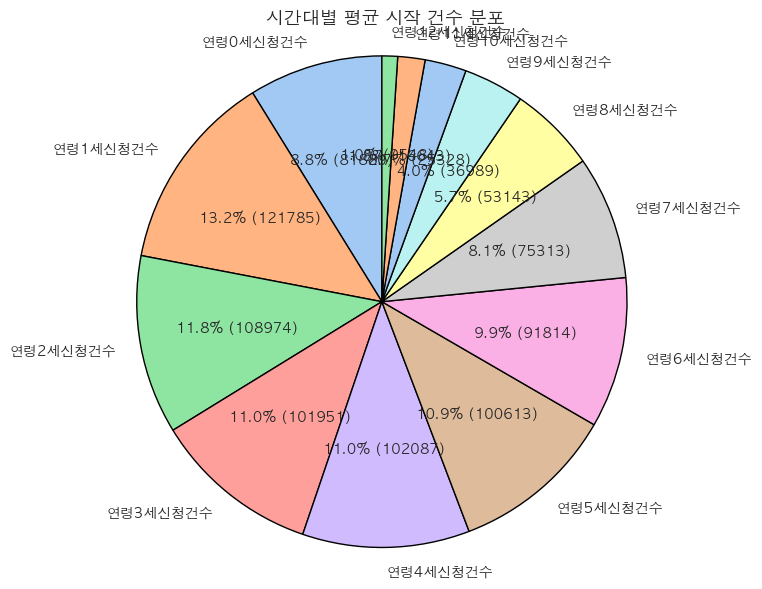

In [ ]:
df =test
import matplotlib.pyplot as plt
import seaborn as sns,pandas as pd

# 시간대별 시작 건수 칼럼만 선택
time_columns = [col for col in df.columns if '시간' in col and '시작건수' in col]

# 시간대별 시작 건수 합산
import pandas as pd

# time_columns 에는 시간대를 나타내는 컬럼 이름들이 포함되어 있다고 가정합니다. 


# 시간대별 합계 계산
time_sum = df[time_columns].sum()

# 시간대별 평균 계산
time_mean = df[time_columns].mean()

# 시간대별 합계와 평균을 하나의 DataFrame으로 합치기
result_df = pd.DataFrame({"합계": time_sum, "평균": time_mean})

# 결과 출력
df_display_centered(result_df)
# 그래프 그리기
# plt.figure(figsize=(12, 6))
# sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")

# # 그래프 제목 및 레이블 추가
# plt.title('시간대별 돌봄 서비스 사용 패턴')
# plt.xlabel('시간대')
# plt.ylabel('총 건수')

# # x축 라벨 회전
# plt.xticks(rotation=45)

# # 그래프 표시
# plt.show()

,합계,평균
